### Problem 1

Generate a set of points from an exponential distribution with some parameter $\lambda$. Derive the Maximum Likelihood estimator for the exponentian distribution, estimate the parameter and compare to the known true parameter.

In [1]:
import numpy as np

Мы вывели оценку максимального правдоподобия для экспоненциального распределения:
$$\lambda = \frac{n}{\sum_{i=1}^{n}x_i}$$

In [2]:
l_true = 2

# генерируя различное число точек (от 10 до 100000) вычислим оценку для параметра
for i in range(1, 6):
    D = np.random.exponential(scale=1/l_true, size=10**i)
    l_est = D.shape[0]/D.sum()
    print(l_est)

1.3630328319403753
2.1938039522929236
1.9774840739169195
2.018106599671909
2.000386688501687


### Problem 2

Select parameters for two non-collinear lines
$$y = a^{(i)}x + b^{(i)}$$
Generate 25 points on each line in the range $x \in [0; 10]$, add random gaussian noise with zero mean and std $\sigma = 0.5$ to each point. Plot to verify that task looks reasonable. Combine all generated points into one array and treat it as an input data.

Implement EM algorithm to estimate parameters of lines. Plot lines to visually verify goodness of fit (plotting lines and corresponding points in different color). Report average MSE for both lines.

In [3]:
#matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
a1, b1, = 2, -5
a2, b2, = -3, 7

x1 = np.random.uniform(low=0, high=10, size=25)
x2 = np.random.uniform(low=0, high=10, size=25)

y1 = a1*x1 + b1 + np.random.normal(0, 1, size=x1.shape)
y2 = a2*x2 + b2 + np.random.normal(0, 1, size=x1.shape)

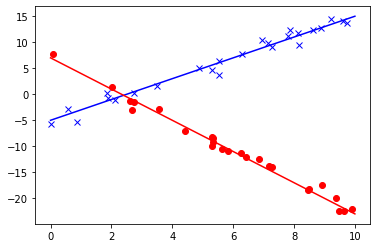

In [5]:
x_base = np.linspace(0,10,100)

plt.plot(x1,y1,'bx', x_base, a1*x_base+b1, 'b-')
plt.plot(x2,y2,'ro', x_base, a2*x_base+b2, 'r-')
plt.show()

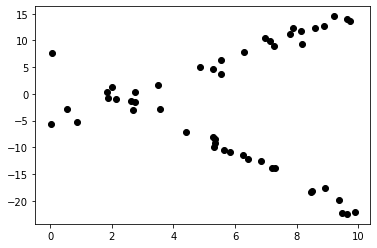

In [6]:
X = np.reshape(np.vstack((x1,x2)), 50)
Y = np.reshape(np.vstack((y1,y2)), 50)

plt.plot(X,Y,'ko')
plt.show()

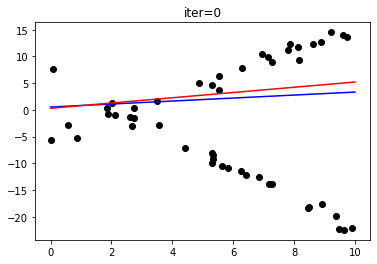

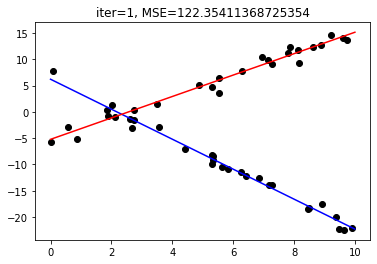

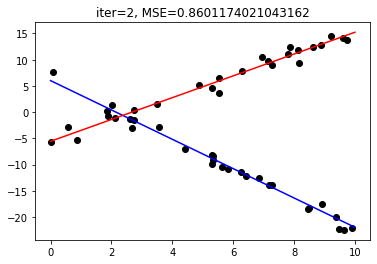

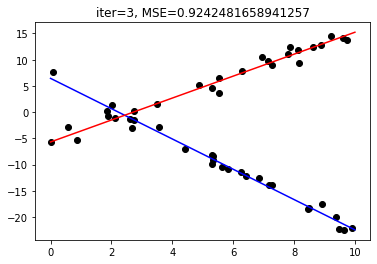

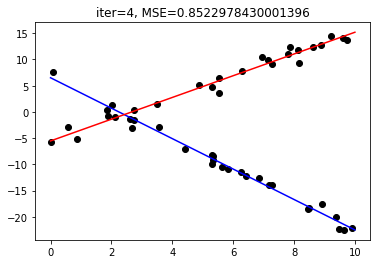

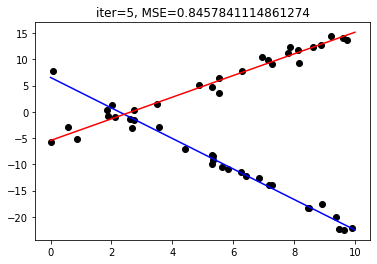

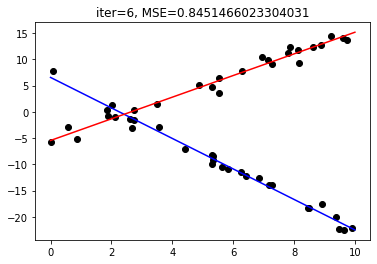

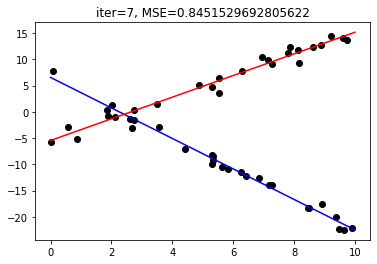

In [8]:
a = np.random.random(2)
b = np.random.random(2)

a_old = a.copy()
b_old = b.copy()

plt.plot(X,Y,'ko')
plt.plot(x_base, a[0]*x_base+b[0],'b-', x_base, a[1]*x_base+b[1],'r-')
plt.title('iter=0')
plt.show()

sigma = np.array([1.0,1.0])

for i in range(15):
    # E-step

    r = np.zeros((X.shape[0], 2))
    r[:,0] = (a[0]*X+b[0]-Y)**2
    r[:,1] = (a[1]*X+b[1]-Y)**2

    w = np.zeros(r.shape)
    w[:,0] = np.exp(-r[:,0]/sigma[0])/(np.exp(-r[:,0]/sigma[0])+np.exp(-r[:,1]/sigma[1]))
    w[:,1] = np.exp(-r[:,1]/sigma[1])/(np.exp(-r[:,0]/sigma[0])+np.exp(-r[:,1]/sigma[1]))

    # M-step

    #least squares
    W1 = np.diag(w[:,0])
    A = W1@np.vander(X, 2)
    z = W1@Y
    theta = np.linalg.pinv(A)@z
    a[0] = theta[0]
    b[0] = theta[1]


    W2 = np.diag(w[:,1])
    A = W2@np.vander(X, 2)
    z = W2@Y
    theta = np.linalg.pinv(A)@z
    a[1] = theta[0]
    b[1] = theta[1]
    
    MSE = (np.mean(r[w[:,0]>=0.5,0])+np.mean(r[w[:,1]>=0.5,1]))/2

    plt.plot(X,Y,'ko')
    plt.plot(x_base, a[0]*x_base+b[0],'b-', x_base, a[1]*x_base+b[1],'r-')
    plt.title('iter={}, MSE={}'.format(i+1, MSE))
    plt.show()
    
    # compare old params and new params
    d = np.sum(np.abs(a-a_old))+np.sum(np.abs(b-b_old))
    if d < 0.001:
        break
    
    a_old = a.copy()
    b_old = b.copy()
    
    # new sigma
    sigma[0] = np.sum(w[:,0]*r[:,0])/np.sum(w[:,0])
    sigma[1] = np.sum(w[:,1]*r[:,1])/np.sum(w[:,1])

### Problem 3

Generate 150 random 2D points from Mixture of Gaussians (select distinct centers and covariance matrices, and some mixing coefficients)
$$p(x) = \sum_{i=1}^{3}\pi_i\mathcal{N}(x; \mu_i, \Sigma_i)$$

Implement EM-algorithm to fit the model.

np.random.multivariate_normal

In [9]:
# выберем параметры для смеси Гауссиан
pi = np.array([0.1, 0.3, 0.6])
mu = np.array([[0,0], [5,3], [-4,6]])
sigma = np.zeros((3,2,2))

sigma[0,:,:] = np.diag([6,6])
sigma[1,:,:] = np.diag([2,5])
sigma[2,:,:] = np.diag([4,1])

In [10]:
# сгенерируем точки: сначала мультиномиальное распределение генерирует сколько точек попадает в какую категорию (гауссиану),
# затем генерируем нужное число точек для каждой гауссианы
D = np.zeros((150,2))
lat = np.zeros(D.shape[0])
idx = np.random.multinomial(D.shape[0], pi)
cnt = 0
for j in range(3):
    for i in range(idx[j]):
        D[cnt,:] = np.random.multivariate_normal(mean=mu[j,:], cov=sigma[j,:,:])
        lat[cnt] = j
        cnt+=1

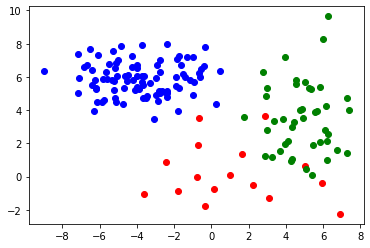

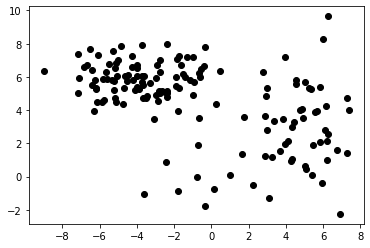

In [11]:
# выведем точки по гауссианам, а затем все вместе
plt.plot(D[lat==0,0],D[lat==0,1], 'ro', D[lat==1,0],D[lat==1,1], 'go', D[lat==2,0],D[lat==2,1], 'bo')
plt.show()
plt.plot(D[:,0],D[:,1], 'ko')
plt.show()

Самостоятельно имплементируйте EM алгоритм для оценки параметров смеси Гауссиан.